# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Taburno, Jasper Thon\
_Student No._: 202008096\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jasper Thon Jaducana Taburno

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [1]:
import numpy as np
from numpy import array
from numpy.linalg import eigh

# Define the specific matrix A
A = np.array([
    [8, -2, -20],
    [-2, -3, -9],
    [-20, -9, -3]
    ])

# Making use of the linalg package to find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Constructing and storing the diagonal matrix into D
D = np.diag(eigenvalues)

# Verify the eigenvalue equation: AV = VD
lhs = np.dot(A, eigenvectors)
rhs = np.dot(eigenvectors, D)

# Check if the two sides are approximately equal
num_ver = np.allclose(lhs, rhs)

# Printing all the variables for a better perspective
print("Matrix A:")
print(A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print("\nDiagonal Matrix D:")
print(D)
print("\nAV:")
print(lhs)
print("\nVD:")
print(rhs)
print("\nNumerical Verification (AV ≈ VD):", num_ver)

Matrix A:
[[  8  -2 -20]
 [ -2  -3  -9]
 [-20  -9  -3]]

Eigenvalues:
[-21.99606195   0.16021522  23.83584674]

Eigenvectors:
[[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]

Diagonal Matrix D:
[[-21.99606195   0.           0.        ]
 [  0.           0.16021522   0.        ]
 [  0.           0.          23.83584674]]

AV:
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]

VD:
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]

Numerical Verification (AV ≈ VD): True


## Physics Application

Matrices are heavily used in different fields of physics, especially in the realm of Quantum Mechanics. We use matrices in setting up mathematical operators that represent physical observables like position, angular momentum, and energy. Solving for the Time-Independent Schrödinger Equation (TISE) often involves recreating the hamiltonian operator as a matrix where the eigenvalues and eigenvectors of such matrix correspond to the energy levels and wavefunctions, respectively. The ease of using python commands to replicate such methods allows us to simplify the numerically-taxing aspects of massive systems and pave the way for us to focus more refining our theories, and ultimately our understanding of the observable universe.



### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

For c = 2, the solution is x = 0.7968118244957711


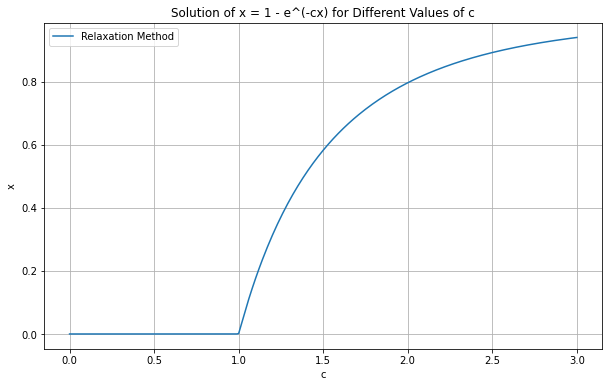

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def relaxation_method(c, x0=0.5, tolerance=1e-6, max_iterations=5000):
    x = x0

    for i in range(max_iterations):
        x_new = 1 - np.exp(-c * x)
        if np.abs(x_new - x) < tolerance:
            return x_new, i + 1  # Return the solution and the number of iterations

        x = x_new

    raise ValueError("Relaxation method did not converge within the maximum number of iterations.")

def solve_equation_for_range(start_c, end_c, step_size):
    c_values = np.arange(start_c, end_c + step_size, step_size)
    solutions = []

    for c in c_values:
        solution, _ = relaxation_method(c)
        solutions.append((c, solution))

    return np.array(solutions)

# 1. Solve for c = 2
solution_c2, _ = relaxation_method(c=2)
print(f"For c = 2, the solution is x = {solution_c2}")

# 2. Solve for c in the range [0, 3] with step size 0.01
solutions = solve_equation_for_range(start_c=0, end_c=3, step_size=0.01)

# 3. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solutions[:, 0], solutions[:, 1], label='Relaxation Method')
plt.title('Solution of x = 1 - e^(-cx) for Different Values of c')
plt.xlabel('c')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

Iteration 1: r = 149999.99995705538, delta = -49999.99995705538
Iteration 2: r = 224999.99978837662, delta = -74999.99983132123
Iteration 3: r = 337499.9991742597, delta = -112499.99938588313
Iteration 4: r = 506249.9969877248, delta = -168749.9978134651
Iteration 5: r = 759374.9892011612, delta = -253124.99221343637
Iteration 6: r = 1139062.4611153728, delta = -379687.4719142116
Iteration 7: r = 1708593.607563792, delta = -569531.1464484192
Iteration 8: r = 2562890.089291679, delta = -854296.4817278872
Iteration 9: r = 3844333.8536930783, delta = -1281443.7644013988
Iteration 10: r = 5766495.481078956, delta = -1922161.6273858775
Iteration 11: r = 8649720.381688425, delta = -2883224.9006094686
Iteration 12: r = 12974478.408146296, delta = -4324758.026457871
Iteration 13: r = 19461245.860029813, delta = -6486767.451883517
Iteration 14: r = 29189634.22749472, delta = -9728388.367464907
Iteration 15: r = 43773661.76413798, delta = -14584027.536643263
Iteration 16: r = 65607702.25739269, 

Iteration 18: r = 384397516.14494187, delta = -2483.855058791868
Iteration 19: r = 384398758.07247096, delta = -1241.9275291081467
Iteration 20: r = 384399379.0362355, delta = -620.9637645236702
Iteration 21: r = 384399689.5181178, delta = -310.48188224499506
Iteration 22: r = 384399844.7590589, delta = -155.2409411073539
Iteration 23: r = 384399922.3795295, delta = -77.62047055364667
Iteration 24: r = 384399961.18976474, delta = -38.81023526191838
Iteration 25: r = 384399980.59488237, delta = -19.405117630958717
Iteration 26: r = 384399990.2974412, delta = -9.702558815479298
Iteration 27: r = 384399995.1487206, delta = -4.851279407739642
Iteration 28: r = 384399997.5743603, delta = -2.425639688968659
Iteration 29: r = 384399998.7871802, delta = -1.2128198444843292
Iteration 30: r = 384399999.3935901, delta = -0.6064099073410033
Iteration 31: r = 384399999.69679505, delta = -0.30320495367050165
Iteration 32: r = 384399999.8483975, delta = -0.15160247683525083
Iteration 33: r = 38439999

Iteration 9: r = 384306806.03035057, delta = -93194.00202440323
Iteration 10: r = 384353403.01728, delta = -46596.98692943139
Iteration 11: r = 384376701.50890815, delta = -23298.491628178002
Iteration 12: r = 384388350.75448793, delta = -11649.245579762368
Iteration 13: r = 384394175.3772482, delta = -5824.622760283812
Iteration 14: r = 384397087.6886246, delta = -2912.3113764186523
Iteration 15: r = 384398543.84431237, delta = -1456.155687756415
Iteration 16: r = 384399271.9221562, delta = -728.0778438234224
Iteration 17: r = 384399635.9610781, delta = -364.0389218936851
Iteration 18: r = 384399817.9805391, delta = -182.01946094645174
Iteration 19: r = 384399908.99026954, delta = -91.00973045827585
Iteration 20: r = 384399954.4951348, delta = -45.50486522913182
Iteration 21: r = 384399977.2475674, delta = -22.75243261456515
Iteration 22: r = 384399988.6237837, delta = -11.376216292381317
Iteration 23: r = 384399994.31189185, delta = -5.688108146190646
Iteration 24: r = 384399997.1559

Iteration 39: r = 384399999.99994826, delta = -5.1736831665039056e-05
Iteration 1: r = 372464406.65262777, delta = -11355315.743536867
Iteration 2: r = 378414890.10361767, delta = -5950483.450989924
Iteration 3: r = 381406641.47831935, delta = -2991751.3747017053
Iteration 4: r = 382903306.67201406, delta = -1496665.1936947359
Iteration 5: r = 383651656.9839338, delta = -748350.3119197424
Iteration 6: r = 384025829.2858781, delta = -374172.3019443439
Iteration 7: r = 384212914.76329815, delta = -187085.4774200111
Iteration 8: r = 384306457.398014, delta = -93542.63471583268
Iteration 9: r = 384353228.7011351, delta = -46771.30312111163
Iteration 10: r = 384376614.3508387, delta = -23385.649703621482
Iteration 11: r = 384388307.1754536, delta = -11692.824614858251
Iteration 12: r = 384394153.5877311, delta = -5846.412277495839
Iteration 13: r = 384397076.7938661, delta = -2923.206134976958
Iteration 14: r = 384398538.39693314, delta = -1461.6030670184202
Iteration 15: r = 384399269.1984

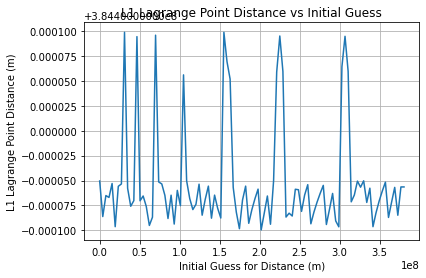

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_point_distance(G, M, m, R, omega, initial_guess, tolerance=1e-4, max_iterations=100):
    # Function representing the equation (GM/r^2) - (Gm/(R-r)^2) - omega^2 * r = 0
    equation = lambda r: (G * M / r**2) - (G * m / (R - r)**2) - omega**2 * r if r != 0 and r != R else np.nan

    # Derivative of the equation
    derivative = lambda r: (-2 * G * M / r**3) + (2 * G * m / (R - r)**3) - omega**2 if r != 0 and r != R else np.nan

    # Initialize the guess
    r = initial_guess

    # Iterative Newton's method
    for i in range(max_iterations):
        delta = equation(r) / derivative(r)
        r -= delta

        # Print intermediate values
        print(f"Iteration {i + 1}: r = {r}, delta = {delta}")

        # Check for convergence
        if abs(delta) < tolerance:
            return r

    # Inform the user about non-convergence
    print("Warning: Newton's method did not converge within the maximum number of iterations.")
    
    # Return a special value to indicate non-convergence
    return np.nan

# Given parameters
G = 6.67430e-11  # Newton's gravitational constant (m^3 kg^−1 s^−2)
M = 5.972e24     # Earth mass (kg)
m = 7.342e22     # Moon mass (kg)
R = 3.844e8      # Distance from Earth to Moon (m)
omega = 2.662e-6  # Angular velocity of the Moon and satellite (rad/s)

# Generate a range of initial guesses
initial_guesses = np.linspace(1e5, R, 100)

# Calculate the Lagrange point distances for each initial guess
lagrange_distances = [lagrange_point_distance(G, M, m, R, omega, guess) for guess in initial_guesses]

# Plot the results
plt.plot(initial_guesses, lagrange_distances)
plt.xlabel('Initial Guess for Distance (m)')
plt.ylabel('L1 Lagrange Point Distance (m)')
plt.title('L1 Lagrange Point Distance vs Initial Guess')
plt.grid(True)
plt.show()